In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import string

print("modules imported successfully.")

modules imported successfully.


In [2]:
data = pd.read_csv("spam.csv", encoding = 'latin1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data = data.rename(columns ={"v1":"Category", "v2":"Message"})
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# def clean_text(Message):
#     '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
#     and remove words containing numbers.'''
#     Message = Message.lower()
#     Message = re.sub('\[.*?\]', '', Message)
#     Message = re.sub('https?://\S+|www\.\S+', '', Message)
#     Message = re.sub('<.*?>+', '', Message)
#     Message = re.sub('[%s]' % re.escape(string.punctuation), '', Message)
#     Message = re.sub('\n', '', Message)
#     Message = re.sub('\w*\d\w*', '', Message)
#     # Message = Message.split()
#     # ps = PorterStemmer()
#     # Message = [ps.stem(word) for word in Message if not word in set(stopwords.words('english'))]
#     # Message = ' '.join(Message)
#     return Message

# data['Message']=data['Message'].apply(clean_text)

# data.head()

In [6]:
x=data['Message']
y=data['Category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [7]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.shape

(5572, 2)

In [9]:
data.info

<bound method DataFrame.info of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham              Will Ì_ b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
data.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    653  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [12]:
data['length']=data['Message'].apply(len)
data.head()

,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


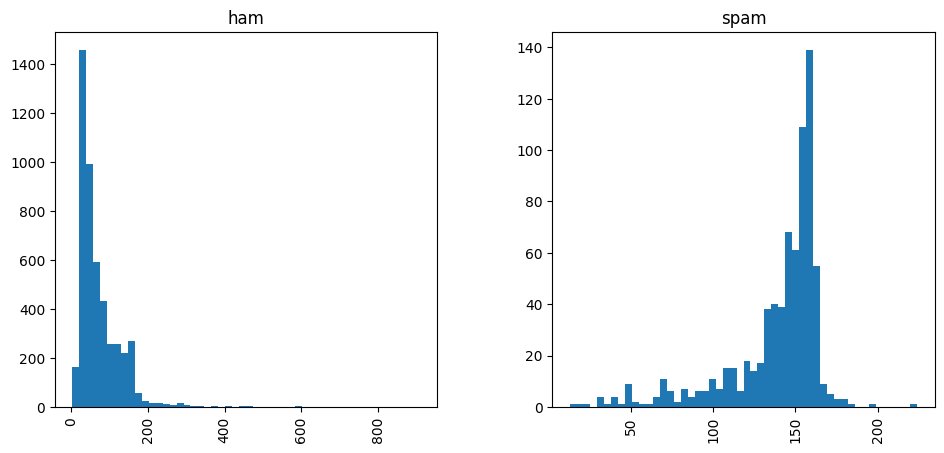

In [13]:
data.hist(column='length', by='Category', bins=50,figsize=(11,5))
plt.show()

In [15]:
data.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [16]:
data.Category.value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: Category, dtype: float64

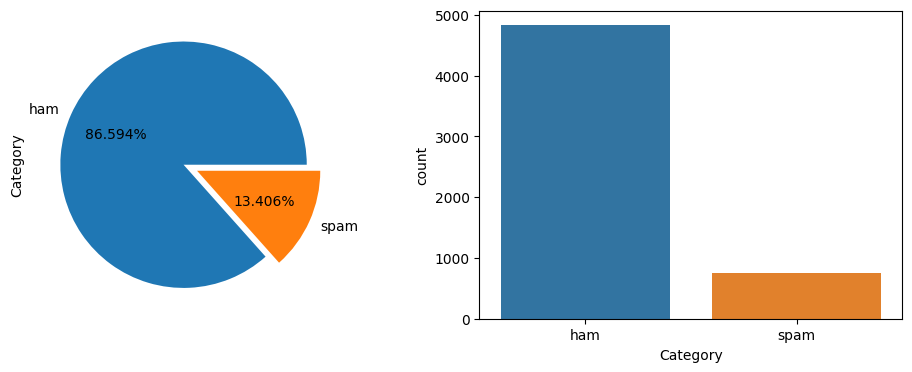

In [22]:
f,ax=plt.subplots(1,2, figsize=(12,4))
data.Category.value_counts().plot.pie(explode=[0,0.12],autopct='%1.3f%%',ax=ax[0])
sns.countplot(x='Category',data=data)
plt.show()